<a href="https://colab.research.google.com/github/olive-su/AI_codepresso/blob/master/Mnist%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_CNN_%EB%AA%A8%EB%8D%B8_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
# train데이터, test데이터 순으로 데이터 받아옴(tuple)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# 60,000개의 이미지(28x28)
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
# 이미지에 대한 matrix정보 확인가능
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# 위의 이미지는 라벨링된 값으로 5를 가짐
train_labels[0]

5

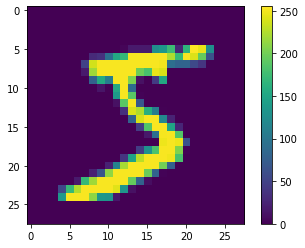

In [6]:
# 실제 시각화 하여 이미지 확인
plt.figure()
plt.imshow(train_images[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()



# 전처리진행
* scailing
* encoding

In [7]:
# 이미지 정보를 MinMax Scaling진행 (0과 1사이의 값)
train_images = train_images/255.
test_images = test_images/255.

In [8]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
# Convolution의 input_data는 3-D tensor 데이터라고 가정되어 있다.
# Mnist데이터의 경우, 흑백 데이터 이므로 2-D tensor 이다.
# 따라서 Convolution Layer의 입력 데이터로 넣을 수 없다. (3-D tensor ≠ 2-D tensor)
train_images[0].shape

(28, 28)

In [10]:
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

In [11]:
train_images[0].shape

(28, 28, 1)

In [12]:
# 라벨인코딩된 값들을 원핫인코딩으로 변환
from tensorflow.keras.utils import to_categorical

In [13]:
train_labels[0]

5

In [14]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# CNN 모델 디자인

In [16]:
from tensorflow.keras import models, layers

In [17]:
model = models.Sequential()

### 모델 설계
* input data : (28,28,1)
* feature extraction : convolution layer, pooling layer
* layers.Flatten() => 1-D tensor
* classification : fully connected layer - 1-D tensor 만 input으로 가능
* output data : (10, )


In [18]:
# 3x3 형태의 filters 32개 입력
# 맨 첫 레이어이므로 input_shape을 지정해줘야함
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
# output shape : 3-D tensor

model.add(layers.Flatten())

model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax')) # 0부터 9까지의 10개의 class에 대한 확률분포 반환

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

## summary 결과 해석
`conv2d (Conv2D)              (None, 26, 26, 32)`
1. 3x3 형태의 filter를 sliding 하여 output shape 축소
2. 26x26 형태로 축소시킨 Feature Map 생성
3. filters = 32 이므로 (26, 26, 32) 생성

`max_pooling2d (MaxPooling2D) (None, 13, 13, 32)`
* pooling 진행
1. pooling_size = (2, 2) 이므로 1/2로 사이즈 축소
 
### Feature Extraction 종료
output shape : `conv2d_2 (Conv2D)            (None, 3, 3, 64) `
- 3-D tensor => 1-D tensor

In [20]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

In [21]:
history = model.fit(x=train_images, y=train_labels, epochs=15, batch_size=256, validation_split=0.2)

Epoch 1/15
188/188 [==============================] - 40s 211ms/step - loss: 0.4144 - accuracy: 0.8679 - val_loss: 0.1372 - val_accuracy: 0.9619
Epoch 2/15
188/188 [==============================] - 40s 211ms/step - loss: 0.0937 - accuracy: 0.9706 - val_loss: 0.0635 - val_accuracy: 0.9800
Epoch 3/15
188/188 [==============================] - 40s 212ms/step - loss: 0.0571 - accuracy: 0.9821 - val_loss: 0.1332 - val_accuracy: 0.9605
Epoch 4/15
188/188 [==============================] - 40s 212ms/step - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.0851 - val_accuracy: 0.9712
Epoch 5/15
188/188 [==============================] - 40s 213ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0440 - val_accuracy: 0.9858
Epoch 6/15
188/188 [==============================] - 40s 212ms/step - loss: 0.0257 - accuracy: 0.9914 - val_loss: 0.0393 - val_accuracy: 0.9887
Epoch 7/15
188/188 [==============================] - 40s 211ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0529 - val_ac

In [22]:
loss, accuracy = model.evaluate(x=test_images, y=test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.0351 - accuracy: 0.9915


## loss, accuracy 값 시각화

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

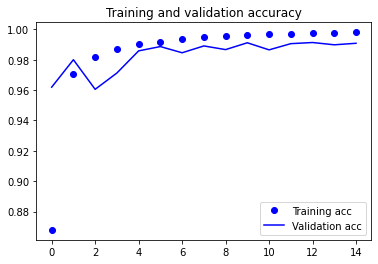

In [24]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

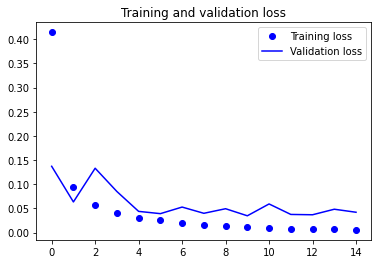

In [25]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 모델의 예측 결과 확인

In [26]:
predict = model.predict(x=test_images[0].reshape((1, 28, 28, 1)))

In [27]:
predict

array([[7.5413117e-17, 1.4044448e-14, 2.6270194e-13, 8.5302304e-10,
        8.2820685e-17, 3.3901003e-15, 1.4429181e-25, 1.0000000e+00,
        8.8493462e-15, 7.2892998e-09]], dtype=float32)

In [28]:
import numpy as np

np.argmax(predict)
# predict내의 최댓값 인덱스 반환

7

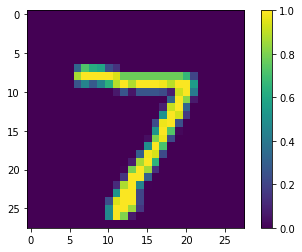

In [29]:
# 실제 시각화 하여 이미지 확인
plt.figure()
plt.imshow(test_images[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()